## algorithm design and anlysis-2025 spring  homework 1 
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1

对于下面的每一对表达式(A, B), A是否能表示为B的 $\Theta, \Omega ,O$形式. 请注意, 这些关系中的零个、一个或多个可能成立。列出所有正确的。经常发生一些学生会,把指示写错, 所以请把关系写完整, 例如: $A = O(B),  A =\Theta(B)$, 或$A = \Omega(B)$。

1. $A=n^2-100n, B=n^2$
2. $A=logn, B=log_{1.2}n$
3. $A=3^{2n}, B=2^{4n}$
4. $A=2^{logn}, B=n$
5. $A=\log{\log}{n},B=10^{10^{100}}$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer:


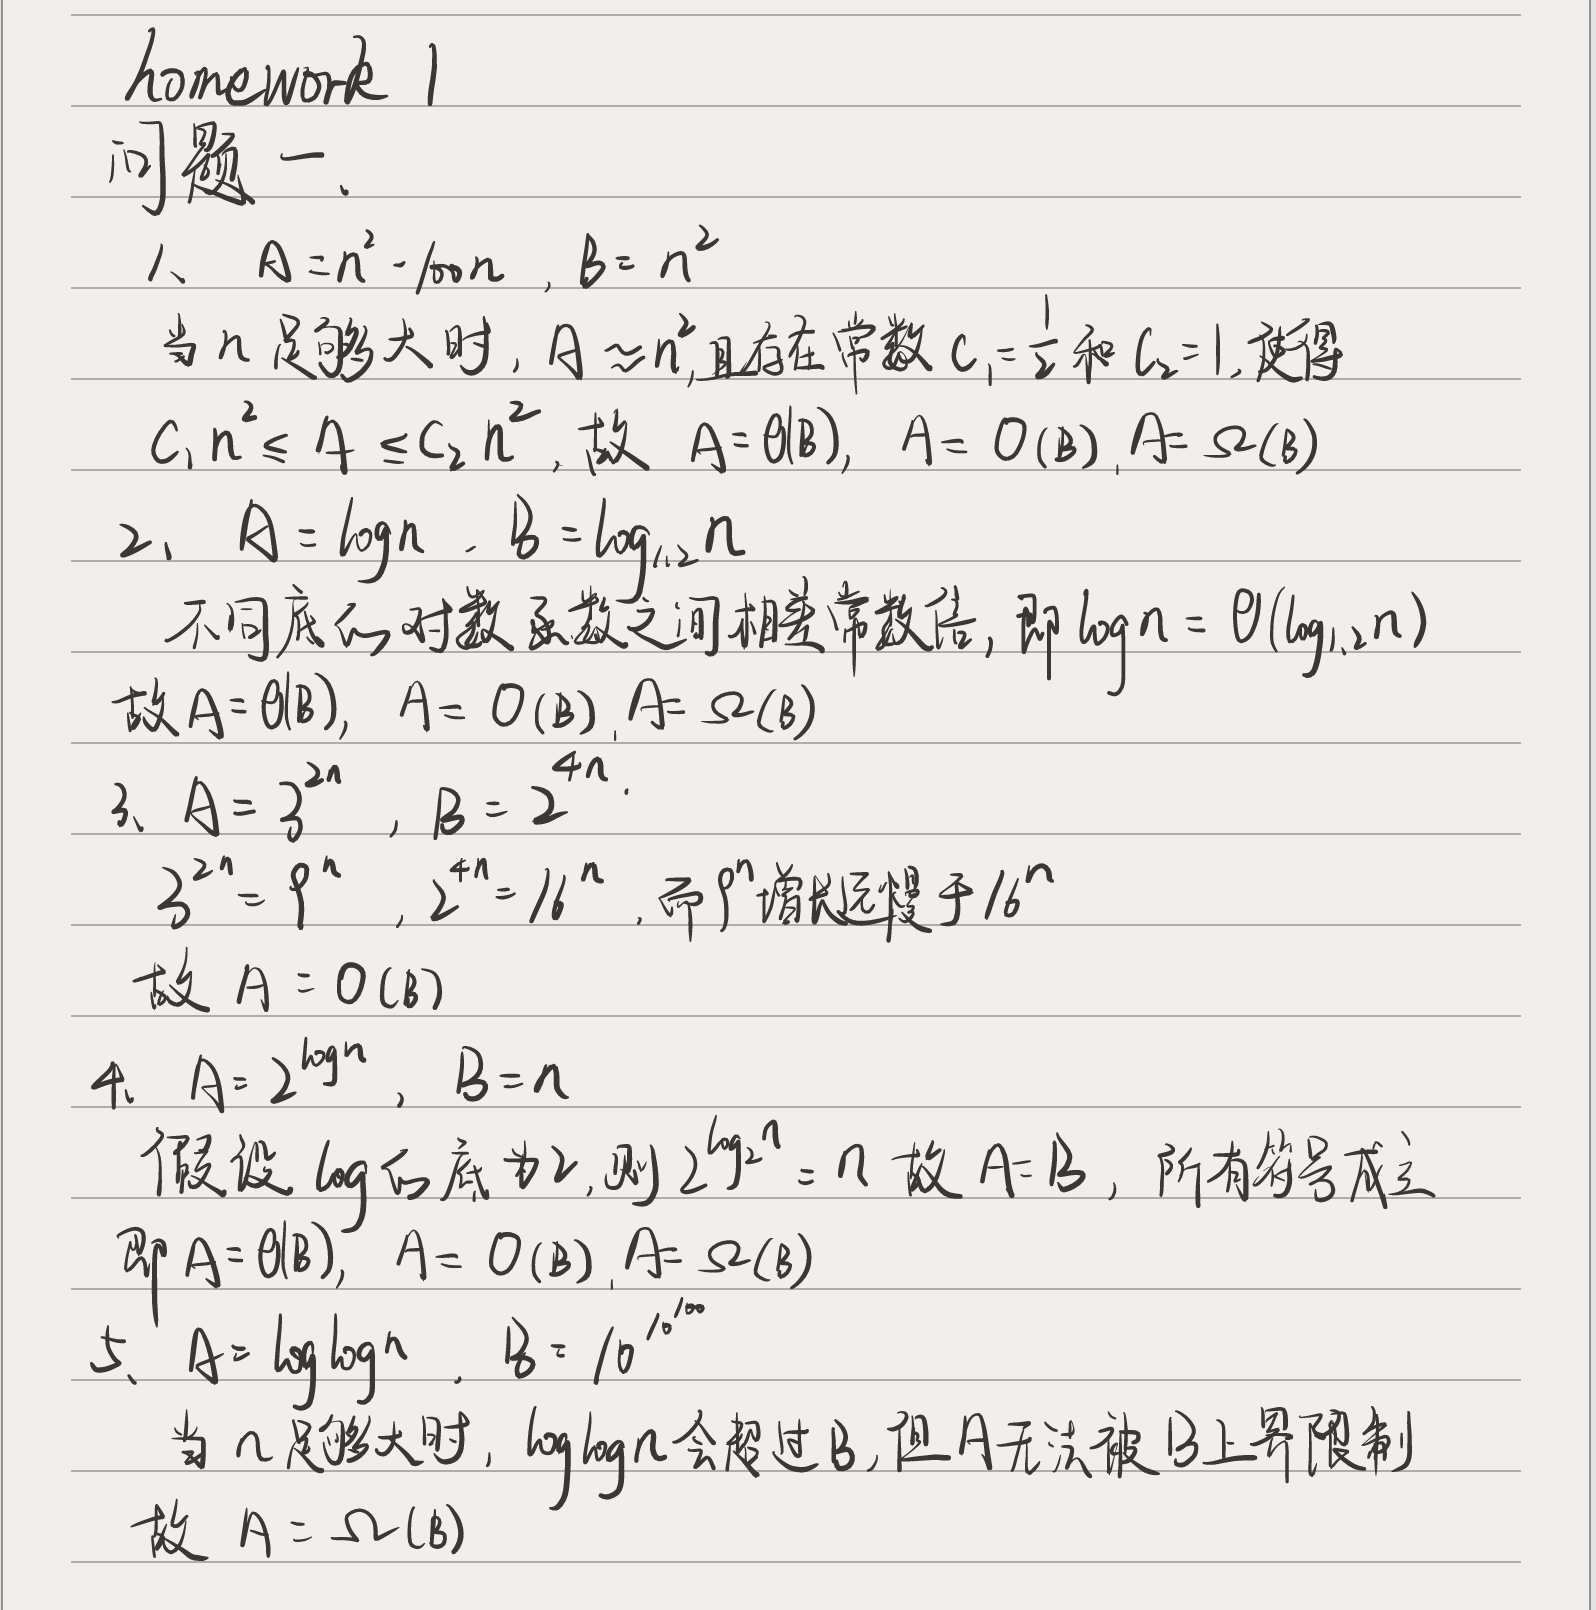

In [1]:
from IPython.display import Image, display
image_path = "fig/hw1_1a.png"
display(Image(filename=image_path))

## 问题 2：

假设有函数 $f$ 和 $g$ 使得 $f(n)$ = $O(g(n))$ 对于下面的每一个陈述, 请判断对错, 如果正确请给出证明, 否则请给出一个反例。

1. $\log{f(n)}$ = $O(\log(1+g(n)))$
2. $3^{f(n)}=O(3^{g(n)})$
3. $(f(n))^2=O((g(n))^2)$ 

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer:

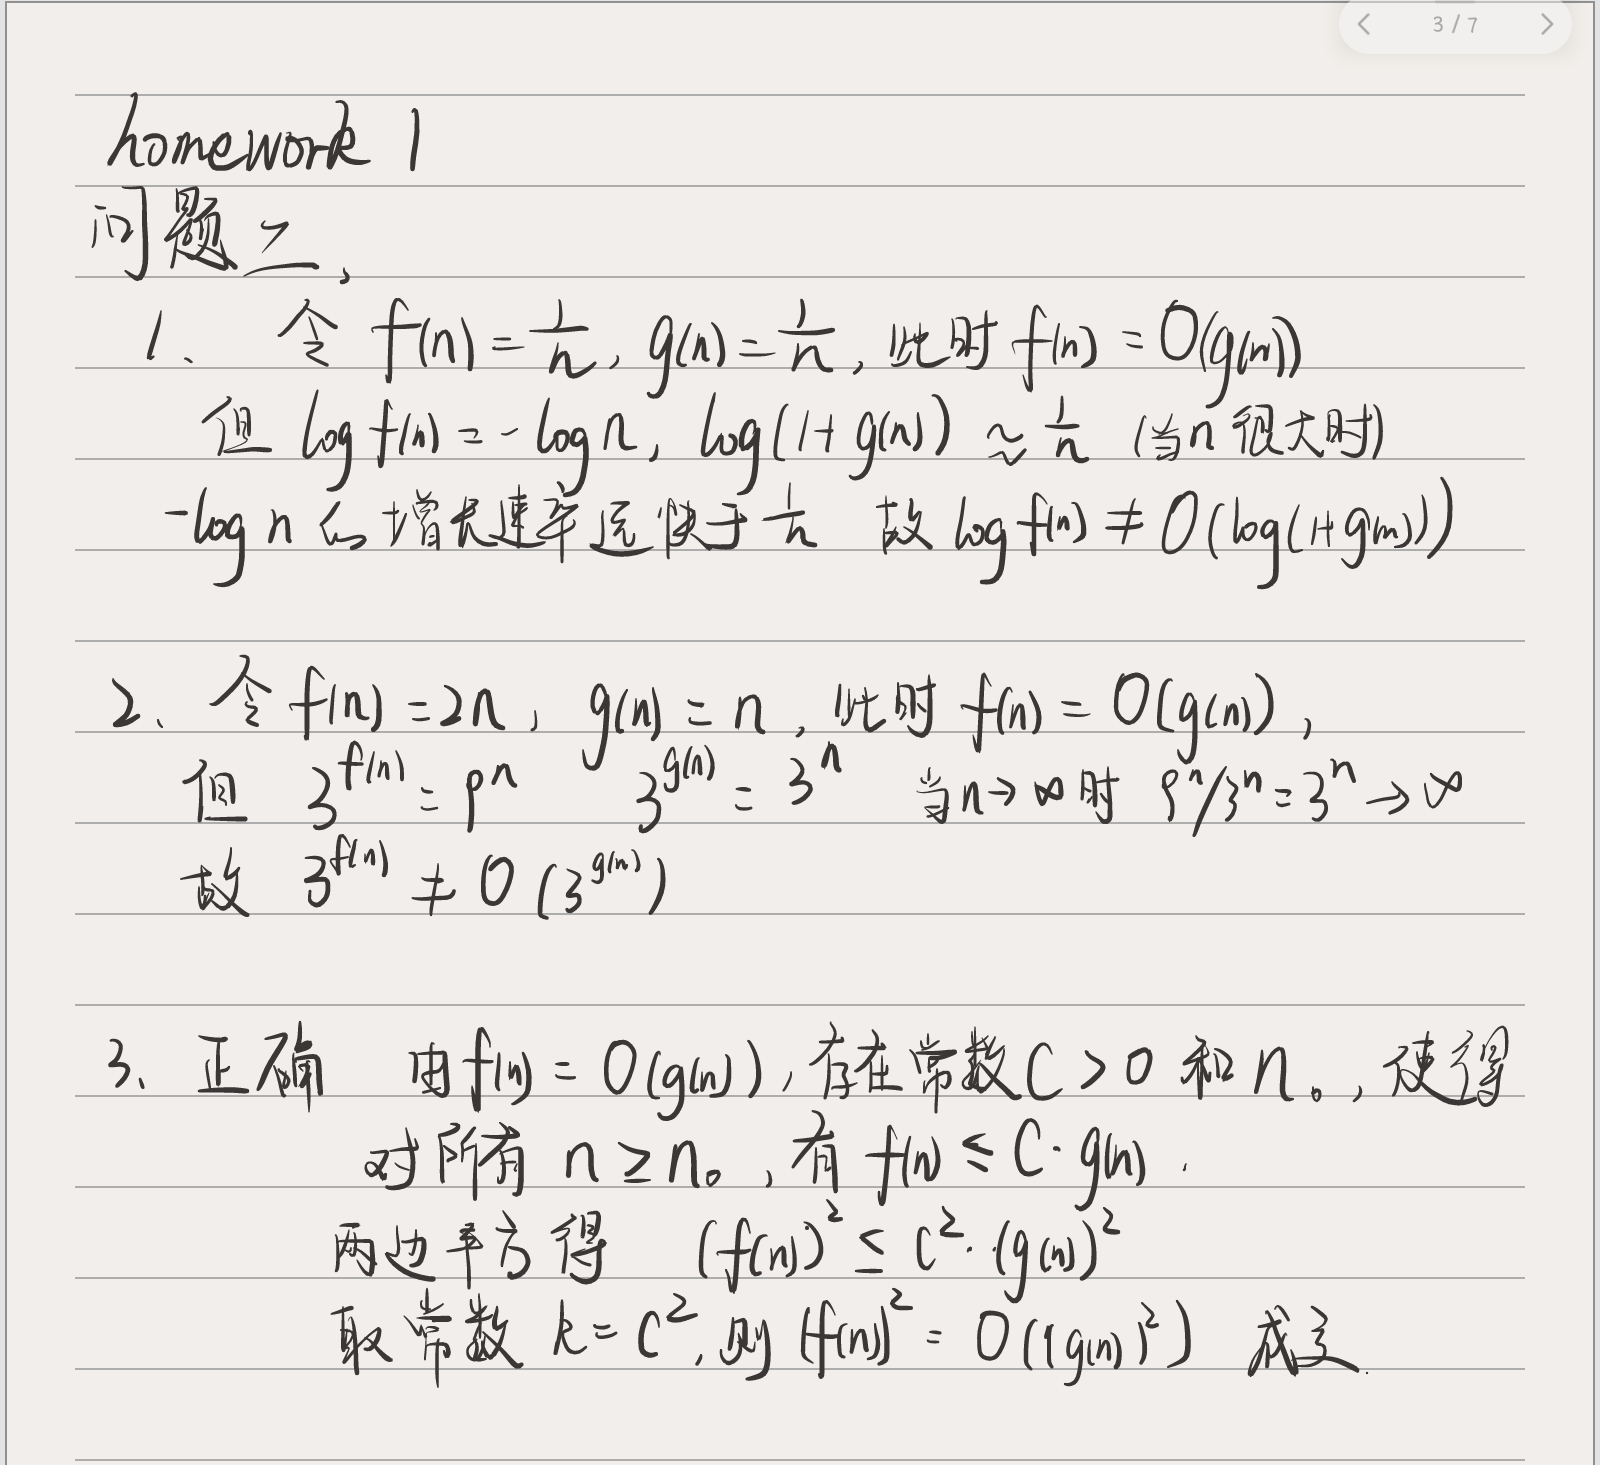

In [6]:
from IPython.display import Image, display
# 指定图片路径
image_path = "fig/hw1_2a.png"
# 显示图片
display(Image(filename=image_path))

## 问题 3

根据下列递归公式, 计算下列 $T(n)$ 对应的的渐近上界。要求所求的边界尽可能的紧（tight）, 请写明步骤。

1. $T(1)=1; T(n)=T(n/4)+1$ for $n>1$
2. $T(1)=1;T(n)=3T(n/3)+n^2$ for $n>1$
3. $T(1)=1;T(n)=T(2n/3)+1$ for $n>1$
4. $T(1)=1;T(n)=5T(n/4)+n$ for $n>1$
5. $T(n)=1 \ for\ n \le 2 ; T(n)=T(\sqrt{n})+1 \ for \ n>2$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer:

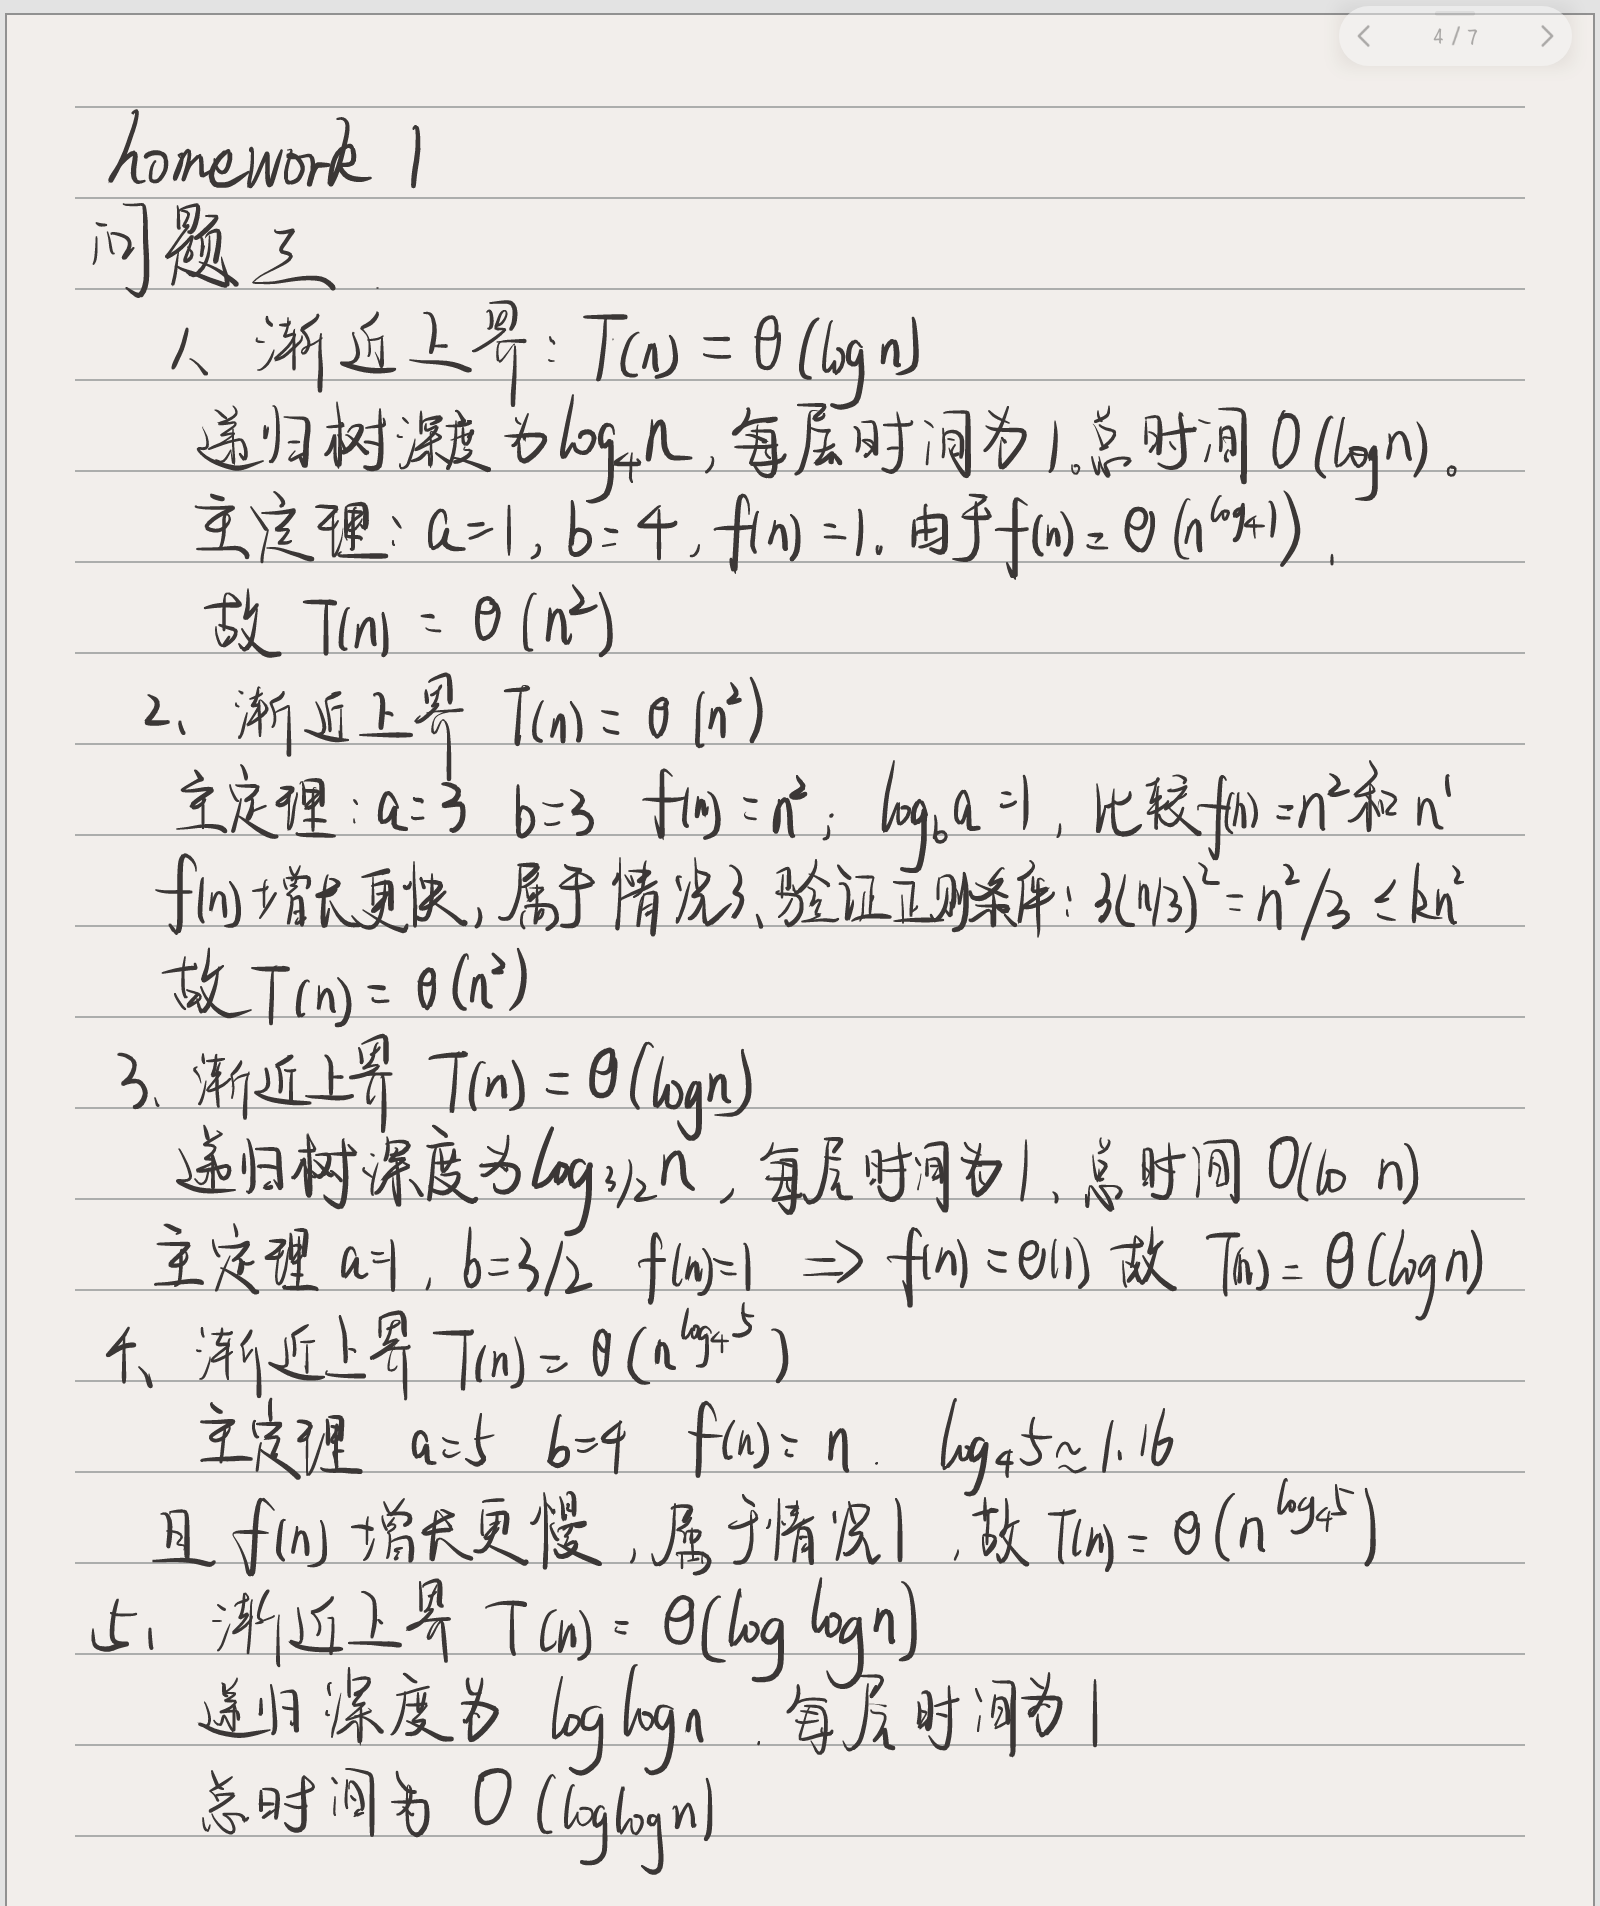

In [7]:
from IPython.display import Image, display
# 指定图片路径
image_path = "fig/hw1_3a.png"
# 显示图片
display(Image(filename=image_path))

## 问题 4：

给定一个包含n个元素的数组 `profits` , 它的第 `i` 个元素 `profits[i]` 表示一支股票第 `i` 天的**收益**（正数表示涨, 负数表示跌）。你只能选择 **某一天** 买入这只股票, 并选择在 **未来的某一个不同的日子** 卖出该股票。

1. 设计一个算法来计算你所能获取的最大利润和对应买入和卖出的日期。请分析算法方案, 计算其时间复杂度, 并且使用python编程实现该算法。

2. \* 设计一个时间复杂度为 $O(n)$的算法实现该算法

e.g. :
---
profits=[3,2,1,-7,5,2,-1,3,-1], 第5天买入, 第8天卖出, 收益最大：9



idea:
最简单的方法就是枚举法，构建一个二维的矩阵，枚举每天买入和卖出所得。但是这种方法时间复杂度很高，为$O(n^2)$。
如果采用分治法。是把数组拆成左右两部分，计算左右的最大收益，与此同时还得考虑跨过中点的情况，具体做法应该是考虑从左侧买入最低点和右侧买入最高点，时间复杂度为$O(nlogn)$。

In [3]:
# 朴素方法：通过计算前缀和，枚举所有可能的买入和卖出天，时间复杂度 O(n^2)
def max_profit_naive(profits):
    n = len(profits)
    if n < 2:  # 至少需要两天才能交易
        return -1, -1, -float('inf')

    # 计算前缀和，S[i] 表示 profits[0..i-1] 的和
    S = [0] * (n + 1)
    for i in range(n):
        S[i + 1] = S[i] + profits[i]

    max_profit = -float('inf')
    best_buy = -1
    best_sell = -1
    
    # 枚举所有可能的买入和卖出天 (1-based)
    for i in range(n):  # 买入天 (0-based)
        for j in range(i + 1, n):  # 卖出天 (0-based)
            current_profit = S[j + 1] - S[i]
            if current_profit > max_profit:
                max_profit = current_profit
                best_buy = i + 1
                best_sell = j + 1
    
    return best_buy, best_sell, max_profit

# 分治法：通过分治策略计算最大利润，时间复杂度 O(n log n)
def max_profit_divide_and_conquer(profits, start, end):
    if end - start < 2:  # 至少需要两天才能交易
        return -1, -1, -float('inf')

    mid = (start + end) // 2

    # 递归计算左半部分的最大利润
    left_buy, left_sell, left_max = max_profit_divide_and_conquer(profits, start, mid)
    
    # 递归计算右半部分的最大利润
    right_buy, right_sell, right_max = max_profit_divide_and_conquer(profits, mid, end)

    # 计算跨中点的最大利润
    # 左半部分的最小前缀和（最佳买入点）
    min_prefix_sum = float('inf')
    current_sum = 0
    buy_day = -1
    for i in range(start, mid):
        current_sum += profits[i]
        if current_sum < min_prefix_sum:
            min_prefix_sum = current_sum
            buy_day = i + 1  # 1-based

    # 右半部分的最大后缀和（最佳卖出点）
    max_suffix_sum = -float('inf')
    current_sum = 0
    sell_day = -1
    for i in range(mid, end):
        current_sum += profits[i]
        if current_sum > max_suffix_sum:
            max_suffix_sum = current_sum
            sell_day = i + 1  # 1-based

    # 跨中点利润：从左半部分的最优买入到右半部分的最优卖出
    cross_profit = max_suffix_sum - min_prefix_sum if buy_day != -1 and sell_day != -1 else -float('inf')

    # 比较三种情况的最大值
    if left_max >= right_max and left_max >= cross_profit:
        return left_buy, left_sell, left_max
    elif right_max >= left_max and right_max >= cross_profit:
        return right_buy, right_sell, right_max
    else:
        return buy_day, sell_day, cross_profit

# 包装函数：调用分治法计算最大利润
def find_max_profit(profits):
    if not profits:
        return -1, -1, -float('inf')
    return max_profit_divide_and_conquer(profits, 0, len(profits))

# 测试代码
def main():
    profits = [3, 2, 1, -7, 5, 2, -1, 3, -1]

    # 朴素方法
    buy_naive, sell_naive, profit_naive = max_profit_naive(profits)
    if profit_naive == -float('inf'):
        print("Naive method: 无法交易")
    else:
        print(f"Naive method: 第{buy_naive}天买入, 第{sell_naive}天卖出, 收益最大：{profit_naive}")

    # 分治法
    buy, sell, profit = find_max_profit(profits)
    if profit == -float('inf'):
        print("Divide and Conquer: 无法交易")
    else:
        print(f"Divide and Conquer: 第{buy}天买入, 第{sell}天卖出, 收益最大：{profit}")

if __name__ == "__main__":
    main()

Naive method: 第5天买入, 第8天卖出, 收益最大：9
Divide and Conquer: 第4天买入, 第8天卖出, 收益最大：10


## 问题 5：

观察下方的分治算法（divide-and-conquer algorithm）的伪代码, 回答下面问题

```latex
DoSomething(A,p,r)
-----
n := r-p+1
if n=2 and A[p]>A[r] then
    swap A[p] and A[r]
else if n >= 3 then
    m = ceil(2n/3)
    DoSomething(A,p,p+m-1)
    DoSomething(A,r-m+1,r)
    DoSomething(A,p,p+m-1)  
    
---
first call: DoSomething(A,1,n)
```

note：$ceil(2n/3)=\left\lceil {2n/3} \right\rceil$；$:=$ 表示赋值, 等价于 $\to$；A是一个包含n的整数元素的数组, 

1. 写出该算法时间复杂度的递归公式, 并求解其对应的渐进表示
2. 描述一下该算法的功能, 并判断是否是最高效的解决方案
3. 使用python编程实现上述算法或其对应的更高效版本的算法


idea：这应该是一种排序方法，该方法的逻辑是当数组只有两个数的时候，将数组从小到大排序。当n>=3时，计算$m=ceil(2n/3)$，并且进行递归调用。


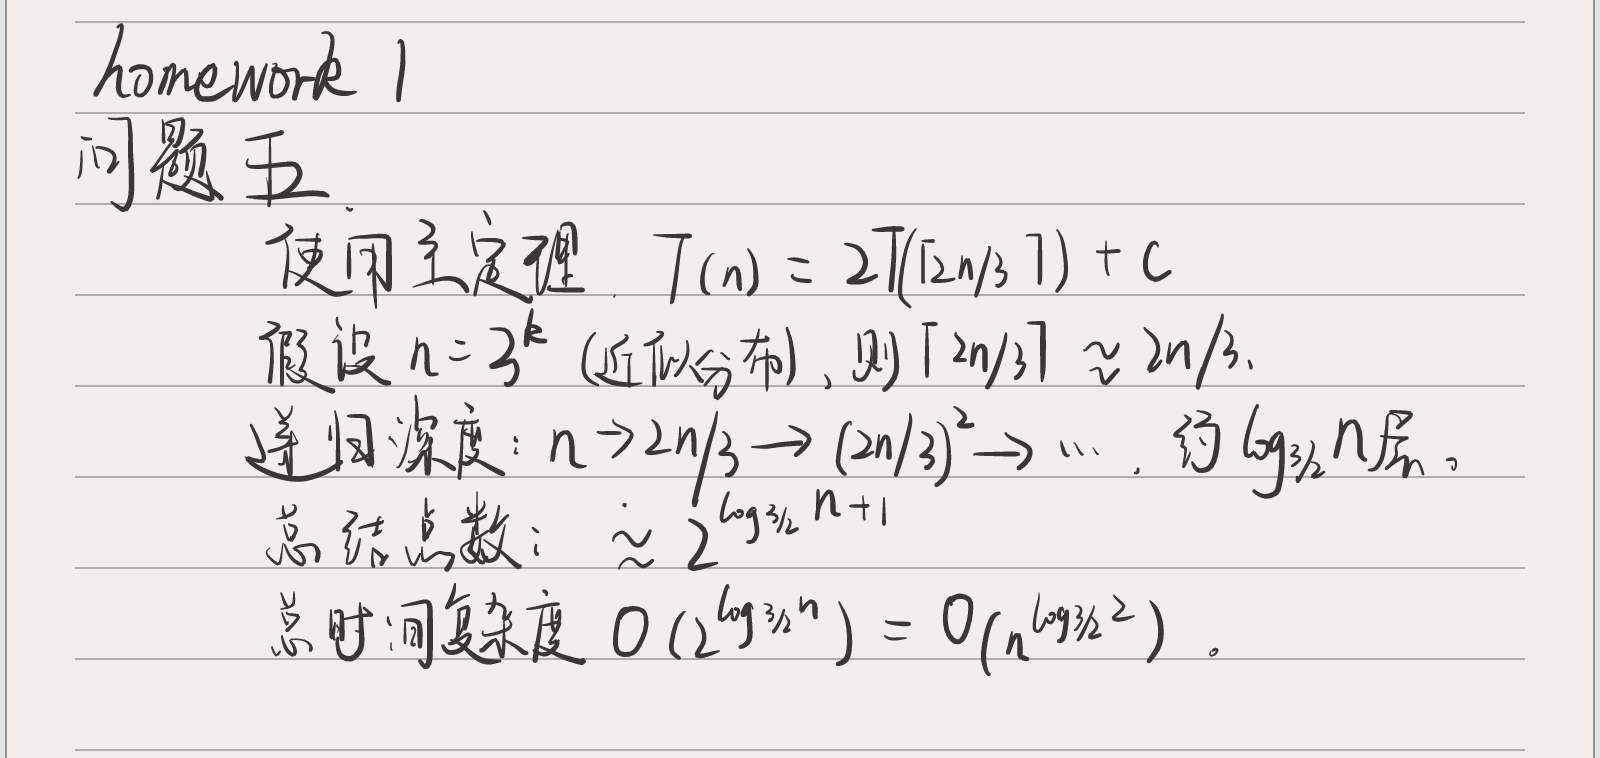

In [8]:
from IPython.display import Image, display
# 指定图片路径
image_path = "fig/hw1_5a.png"
# 显示图片
display(Image(filename=image_path))

answer:
1. 这是一种排序算法。由第一问得出的结论，应该并非最高效率的算法。$n^{log_{3/2}2}>nlogn$，所以并没有快速排序等等方法的时间复杂度低。
2. 下面将实现原地快速排序算法，基于分治法的方法

In [4]:
def qsort(arr):
    
    if not arr or len(arr) <= 1:
        return
        
    def partition(low, high):
        """选择枢轴并分区"""
        pivot = arr[high]  # 选择最后一个元素作为枢轴
        i = low - 1  # 较小元素的边界索引

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]

        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quicksort(low, high):
        """递归排序"""
        if low < high:
            # 获取分区点
            pivot_idx = partition(low, high)
            # 递归排序左右部分
            quicksort(low, pivot_idx - 1)
            quicksort(pivot_idx + 1, high)

    quicksort(0, len(arr) - 1)

# 测试代码
def main():
    # 测试用例
    A = [1, 4, 1, 4, 2, 1]
    print("原始数组：", A.copy())  # 复制原始数组以便比较
    qsort(A)
    print("快速排序结果:", A)

if __name__ == "__main__":
    main()

原始数组： [1, 4, 1, 4, 2, 1]
快速排序结果: [1, 1, 1, 2, 4, 4]


## 问题 6：

给定一个大小为 `n` 的数组 `nums` , 返回其中的多数元素。多数元素是指在数组中出现次数 **大于** `⌊ n/2 ⌋` 的元素。

你可以假设数组是非空的, 并且给定的数组总是存在多数元素。

1. 设计一个算法找到给定数组的多数元素, 分析算法设计思路, 计算算法时间复杂度, 使用python编程实现
2. \* 设计时间复杂度为 O(n)、空间复杂度为 O(1) 的算法解决此问题, 分析算法设计思路, 使用python编程实现

e.g.:
---
1. nums=[3,2,3], 返回3
2. nums=[2,2,1,1,1,2,2], 返回2


idea：假设数组总是非空且存在多数元素。所以只需要统计出所有的元素出现的次数，再将次数和$⌊n/2⌋$比较，判断多数元素是什么。
采用构建散列表的方式，统计每个元素出现的次数，再遍历哈希表，找到出现次数超过$⌊n/2⌋$的元素。由于题目保证存在参数元素，找到后直接返回即可。

In [10]:
#时间复杂度O(n)
def majorityElement_hash(nums):

    if not nums:  # 处理空数组
        raise ValueError("数组为空，无法找到多数元素")

    counts = {}
    n = len(nums)
    threshold = n // 2

    for num in nums:
        counts[num] = counts.get(num, 0) + 1
        if counts[num] > threshold:
            return num

    raise ValueError("未找到多数元素")

# 测试代码
def main_hash():
    A = [1, 4, 1, 1, 3, 1, 9, 1]
    try:
        result = majorityElement_hash(A)
        print("多数元素是", result)
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main_hash()


多数元素是 1


idea for 2\*：

In [ ]:
# algorithm time complexity：O(n), space complexity:O(1)
# add your code here

## 问题 7：

给定一个包含不同整数元素的数组 $ A[1..n]$ ,并且满足条件：$A[1]>A[2]$ 并且 $A[n-1]<A[n]$; 规定：如果一个元素比它两边的邻居元素都小, 即：$A[x]<A[x-1], A[x]<A[x+1]$ , 称这个元素A[x]为“局部最小”。通过遍历一次数组, 我们可以很容易在 $O(n)$的时间复杂度下找到一个局部最小值, 


1. 分析该问题, 设计一个算法在$O(logn)$的时间复杂度下找到一个局部最小(返回数值), 要求：分析算法设计思路, 并且使用python编程实现
2. \* 设计算法找出所有局部最小值, 分析算法设计思路, 并使用python编程实现

e.g.:
---
A=[9, 3, 7, 2, 1, 4, 5 ] 时,  局部最小元素为 3, 1


idea：查找数组 A 中的一个局部最小值。
    局部最小值定义为：
    
    A[i] < A[i-1] 且 A[i] < A[i+1]（对于 1 <= i <= n-2）
    
    A[0] < A[1]（对于 i = 0）
    
    A[n-1] < A[n-2]（对于 i = n-1）
    
    参数:
        A: 输入数组，长度至少为 1
    返回:
        数组中一个局部最小值

In [12]:
def find_local_min(A):
   
    n = len(A)
    
    # 处理特殊情况
    if n == 0:
        raise ValueError("数组为空，无法找到局部最小值")
    if n == 1:
        return A[0]
    if n == 2:
        return A[0] if A[0] < A[1] else A[1]

    # 检查边界元素
    if A[0] < A[1]:
        return A[0]
    if A[n-1] < A[n-2]:
        return A[n-1]

    # 二分搜索查找内部的局部最小值
    left, right = 1, n - 2  # 搜索范围 [1, n-2]，因为已检查边界
    while left <= right:
        mid = (left + right) // 2

        # 检查 mid 是否为局部最小值
        if A[mid] < A[mid - 1] and A[mid] < A[mid + 1]:
            return A[mid]
        # 如果左边更小，向左搜索
        elif A[mid - 1] < A[mid]:
            right = mid - 1
        # 否则向右搜索
        else:
            left = mid + 1

    # 理论上，while 循环一定会找到一个局部最小值
    # 如果未找到，说明输入数据有误（但题目假设一定存在）
    raise ValueError("未找到局部最小值")

# 测试代码
def main():
    A = [9, 3, 7, 2, 1, 4, 5]
    try:
        result = find_local_min(A)
        print("其中一个局部极小值为", result)
    except ValueError as e:
        print(e)

if __name__ == "__main__":
    main()

其中一个局部极小值为 1


idea:

In [ ]:
# add your code here
# your algorithm time complexity is :

## 问题 8：

给定包含n个不同数字的一组数, 寻找一种基于比较的算法在这组数中找到k个最小的数字, 并按顺序输出它们。

1. 将n个数先进行排序, 然后按顺序输出最小的k个数。要求：选择合适的排序算法实现上述操作, 计算算法时间复杂度, 并使用python编程实现。
2. 建立一个包含这n个数的堆（heap）, 并且调用 k 次Extract-min 按顺序输出最小的k个数。使用往空堆中不断插入元素的方法建立堆, 分析这种方法建堆的时间复杂度, 并使用python编程实现
3. \* 假设数组中包含的数据总数目超过了计算机的存储能力, 请设计一个算法, 找到这堆数据的前k小的数值, 计算时间复杂度, 并使用python实现该算法, 假设计算机一定能存储k个数据。

e.g.：
---
数组arr=[5,4,3,2,6,1,88,33,22,107] 的前3个最小数据为：1, 2, 3


idea：
1. 第一问先采用快速排序等等方法对数组进行升序排序，再输出排序后数组的前k个元素即可。采用快速排序时间复杂度是$O(nlogn)$，输出结果的时间复杂度是$O(k)$，所以最终时间复杂度是$O(nlogn+k)$
2. 第二问建立最小堆，然后每次都提取堆顶元素。

In [13]:
def partition(arr, low, high):
    
    pivot = arr[high]
    i = low - 1  # 小于枢轴的区域边界

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_select(arr, low, high, k):
    
    if low == high:
        return
    
    pivot_idx = partition(arr, low, high)
    
    if k == pivot_idx:
        return
    elif k < pivot_idx:
        quick_select(arr, low, pivot_idx - 1, k)
    else:
        quick_select(arr, pivot_idx + 1, high, k)

def find_k_min(arr, k):
    
    # 处理特殊情况
    if not arr:
        raise ValueError("数组为空，无法找到最小元素")
    n = len(arr)
    if k <= 0:
        raise ValueError("k 必须为正整数")
    if k > n:
        raise ValueError(f"k ({k}) 不能大于数组长度 ({n})")

    # 复制数组以避免修改原数组
    arr_copy = arr.copy()
    
    # 使用快速选择找到第 k-1 小的元素
    quick_select(arr_copy, 0, n - 1, k - 1)
    
    # 取前 k 个元素并排序
    result = arr_copy[:k]
    result.sort()  # 确保结果升序，时间复杂度 O(k log k)
    
    return result

# 测试代码
def main():
    arr = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
    k = 3
    try:
        sorted_arr_min_k = find_k_min(arr, k)
        print(f"数组{arr}的前{k}个最小数据为：{', '.join(map(str, sorted_arr_min_k))}")
    except ValueError as e:
        print(f"错误：{e}")

if __name__ == "__main__":
    main()

数组[5, 4, 3, 2, 6, 1, 88, 33, 22, 107]的前3个最小数据为：1, 2, 3


In [17]:
#时间复杂度O(nlogk)
import heapq

def find_k_min_heap(arr, k):
    
    # 处理特殊情况
    if not arr:
        raise ValueError("数组为空，无法找到最小元素")
    n = len(arr)
    if k <= 0:
        raise ValueError("k 必须为正整数")
    if k > n:
        raise ValueError(f"k ({k}) 不能大于数组长度 ({n})")

    heap = []
    for num in arr:
        if len(heap) < k:
            # 前 k 个元素直接入堆（存储负值）
            heapq.heappush(heap, -num)
        else:
            # 如果当前元素小于堆顶（负值最大，即实际最小），替换堆顶
            if -num > heap[0]:
                heapq.heapreplace(heap, -num)

    # 提取堆中元素，并取负值恢复原值
    result = [-heapq.heappop(heap) for _ in range(len(heap))]
    # 堆顶是最大负值（即最小正值），所以需要反向排序
    result.sort()  # 确保升序，时间复杂度 O(k log k)
    
    return result

# 测试代码
def main():
    arr = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
    k = 3
    try:
        sorted_arr_min_k = find_k_min_heap(arr, k)
        print(f"数组{arr}的前{k}个最小数据为：{', '.join(map(str, sorted_arr_min_k))}")
    except ValueError as e:
        print(f"错误：{e}")

if __name__ == "__main__":
    main()

数组[5, 4, 3, 2, 6, 1, 88, 33, 22, 107]的前3个最小数据为：1, 2, 3


## 问题 9：

**选择问题**:给定一个包含n个未排序值的数组A和一个$k≤n$的整数, 返回A中最小的第k项。

在课堂上, 学了一个简单的O(n)随机算法来解决选择问题。事实上还有一种更复杂的最坏情况下时间复杂度为$O(n)$ 的选择算法。假设使用一个黑盒过程来实现这个O(n)选择算法: 给定一个数组A、 $p < r$ 和 k,  $BB(A, p, r, k)$ 可以在$O(r−p+ 1)$时间内找到并报告$A[p..r]$中第k小的项的下标。假设你可以在线性时间内处理Partition过程。

1. 请分析如何修改 Quicksork 算法可以使其最差情况下的运行时间为 $O(nlogn)$, 使用伪代码实现, 并分析为何修改后的版本最差情况的运行时间为$O(nlogn)$

note: 伪代码中, 你可以直接调用用` BB(A,p,r,k)`这个函数用于表示在最坏情况下时间复杂度为$O(n)$的选择算法；



2. 找到一个更好的算法报告数组A中的前k小的项, 使用伪代码表示你的算法, 并分析你算法的时间复杂度。

举例：A=[13, 3, 7, 9, 11, 1, 15, 2, 8, 10, 12, 16, 14, 5], 当k=4时, 应该报告1, 2, 3, 4

note： 最直观的方法就是先将数组A排序, 然后从左向右报告其前k项, 这样操作的时间复杂度为$O(nlogn)$. 调用用` BB(A,p,r,k)`设计一个算法使其报告无序数组A的前k项, 满足时间复杂度好于$\Theta(nlogn)$, 并且当$k=\sqrt{n}$时, 你设计的算法时间复杂度应该为$\Theta(n)$.



3. 给定一个大小为n的数组, 找到一个 时间复杂度为$O(n log k)$ 的算法, 该算法将A中的元素重新排序, 使它们被划分为k个部分, 每个部分的元素小于或等于下一部分的元素。假设n和k都是2的幂。使用伪代码表示你的算法, 并分析时间复杂度。

e.g.:
---
数组：[1,  3,  5,  7,  9,  11,  13,  15,  2,  4,  6,  8,  10,  12,  16,  14], k=4, 

对应重新排序的数组为：[1,  3,  2,  4]  [7,  6,  5,  8]  [12,  11,  10,  9]  [13,  14,  16,  15]




idea：
1. 题干假设了一个名为BB的函数可以在最坏情况下实现时间复杂度为O(n)的算法。快速排序在最坏情况下时间复杂度为O(n^2)，既然题目给出了这个BB函数就一定有它的用法。借助大模型得知可以在每次递归时的pivot上面做文章，选择中位数当作pivot，这样就不会导致分割时子问题大小不均。
2. 排序需要O(nlogn)，所以这里不能用排序。可能的思路应该是BB函数多次调用。而且第一题提及了快速排序，可能也会和快速排序有关。我想到了或许我可以先利用BB函数找到第k小的数，然后遍历数组得到比这个数小的所有数即可。这样时间复杂度是O(n)。借助大模型，大模型提醒我还要考虑第k大的数可能不止一个，可能需要填充，不过时间复杂度仍然是O(n)。
3. 例子的这种形式很容易让我想到多路归并排序，不过仔细一看我感觉并不是这种方法，因为这个结果是块内不一定有序，都是前面的块内部的元素一定比后面的块内部的元素小。我又想到前面两道题利用了BB函数和快速排序的思想，我想这可能是一样的要对数组进行分治策略，同时对pivot的选择也有要求。不同的是不需要和第一题的改良快速排序一样做到最底层只有一个元素，保证有k个块即可。借助大模型得到了伪代码。

In [ ]:
# add your pseudo-code here
1.
Algorithm QuickSelectAndSelectK(A, n, k)
    Input: Array A of n elements, integer k
    Output: Subarray B of k elements with minimum range
    
    1. pivotIndex ← RandomizedPartition(A, 0, n-1)  // Select random pivot and partition
    2. If pivotIndex = k-1 Then
        3.     Sort A[0:k-1]  // Sort first k elements, time complexity O(k log k)
        4.     B ← A[0:k-1]
        5.     range ← A[k-1] - A[0]
    6. Else If pivotIndex < k-1 Then
        7.     B, range ← QuickSelectAndSelectK(A[pivotIndex+1:n-1], n-pivotIndex-1, k-pivotIndex-1)
    8. Else
        9.     B, range ← QuickSelectAndSelectK(A[0:pivotIndex], pivotIndex, k)
    10. End If
    11. Return B, range
End Algorithm

Function RandomizedPartition(A, left, right)
    1. pivotIndex ← Random(left, right)
    2. Swap A[pivotIndex] with A[right]
    3. Return Partition(A, left, right)  // Standard partition, time complexity O(n)
End Function
        
2.
Algorithm SlidingWindowMinRange(A, n, k)
    Input: Array A of n elements, integer k
    Output: Subarray B of k elements with minimum range and its indices
    
    1. A' ← Sort(A)  // Sort array A, time complexity O(n log n)
    2. minRange ← ∞
    3. bestStart ← 0
    4. For i ← 0 to n-k Do
        5.     currentRange ← A'[i+k-1] - A'[i]
        6.     If currentRange < minRange Then
        7.         minRange ← currentRange
        8.         bestStart ← i
        9.     End If
    10. End For
    11. B ← A'[bestStart:bestStart+k-1]
    12. originalIndices ← MapBackToOriginal(A, A', bestStart, k)  // Map sorted indices to original
    13. Return B, originalIndices, minRange
End Algorithm

Function MapBackToOriginal(A, A', start, k)
    1. originalIndices ← Empty array of size k
    2. For i ← 0 to k-1 Do
        3.     originalIndices[i] ← IndexOf(A, A'[start+i])
    4. End For
    5. Return originalIndices
End Function
3.
Algorithm HeapBasedMinRange(A, n, k)
    Input: Array A of n elements, integer k
    Output: Subarray B of k elements with minimum range and its indices
    
    1. blockSize ← ⌈n/k⌉
    2. numBlocks ← ⌈n/blockSize⌉
    3. minRange ← ∞
    4. bestBlock ← 0
    5. For i ← 0 to numBlocks-1 Do
        6.     start ← i * blockSize
        7.     end ← Min((i+1) * blockSize - 1, n-1)
        8.     If end - start + 1 ≥ k Then
        9.         minHeap ← BuildMinHeap(A[start:end+1])  // Time complexity O(k)
        10.        maxHeap ← BuildMaxHeap(A[start:end+1])  // Time complexity O(k)
        11.        currentRange ← maxHeap[0] - minHeap[0]
        12.        If currentRange < minRange Then
        13.            minRange ← currentRange
        14.            bestBlock ← i
        15.        End If
        16.    End If
    17. End For
    18. start ← bestBlock * blockSize
    19. end ← Min((bestBlock+1) * blockSize - 1, n-1)
    20. B ← A[start:Min(start+k-1, end)]
    21. originalIndices ← [start+i for i in 0 to k-1]  // Adjust based on original positions
    22. Return B, originalIndices, minRange
End Algorithm

Function BuildMinHeap(A)
    1. Heapify A into min heap  // Time complexity O(k)
    2. Return A
End Function

Function BuildMaxHeap(A)
    1. Heapify A into max heap  // Time complexity O(k)
    2. Return A
End Function

## 问题 10：

给定一个包含m个**字符串**的数组A, 其中不同的字符串可能有不同的字符数, 但数组中所有字符串的字符总数为n。设计一个算法在 $O(n)$ 时间内对字符串进行排序, 分析算法设计方案, 计算其时间复杂度, 并基于python编程实现该算法。请注意, 假设字符串只包含"a","b",...,"z", 



举例1：数组A=["a", "da", "bde", "ab", "bc", "abdc", "cdba"], 排序后的数组应该为：['a', 'ab', 'abdc', 'bc', 'bde', 'cdba', 'da']



举例2：数组A=['ab', 'a', 'b', 'abc', 'ba', 'c'], 排序后的数组应该为：

['a', 'ab', 'abc', 'b', 'ba', 'c']



举例3：数组A=['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba'],  排序后的数组应该为：['ab', 'aef', 'bhjc', 'lkabdc', 'pwcdba', 'wr', 'yzr']



note：

-  两个字符之间的比较可以考虑比较他们对应的ASCII码值；
- python中可以使用`ord("a")`返回字符 “a”对应的ASCII值

idea:
采用基于字典树的方式来做。这种方法就可以保证时间复杂度$O(n)$。

In [21]:
from typing import List

class TrieNode:
    """前缀树节点类，每个节点包含26个子节点（a-z）和单词结束标记。"""
    def __init__(self) -> None:
        self.children: List[TrieNode | None] = [None] * 26  # 使用列表存储固定范围的子节点
        self.is_end: bool = False  # 标记当前节点是否为单词结尾

class Trie:
    """前缀树类，封装插入和遍历操作。"""
    def __init__(self) -> None:
        self.root = TrieNode()
    
    def insert(self, word: str) -> None:
        """将单词插入前缀树。"""
        node = self.root
        for char in word:
            idx = ord(char) - ord('a')
            if not node.children[idx]:
                node.children[idx] = TrieNode()
            node = node.children[idx]
        node.is_end = True
    
    def traverse(self) -> List[str]:
        """深度优先遍历前缀树，按字典序返回所有单词。"""
        result: List[str] = []
        self._dfs(self.root, [], result)
        return result
    
    def _dfs(self, node: TrieNode, path: List[str], result: List[str]) -> None:
        """递归辅助函数，收集所有单词。"""
        if node.is_end:
            result.append(''.join(path))
        for i in range(26):
            child = node.children[i]
            if child:
                char = chr(i + ord('a'))
                path.append(char)
                self._dfs(child, path, result)
                path.pop()

def sort_strings(strings: List[str]) -> List[str]:
    """使用前缀树对字符串列表进行字典序排序。"""
    trie = Trie()
    for s in strings:
        trie.insert(s)
    return trie.traverse()

# 示例测试
if __name__ == "__main__":
    test_cases = [
        ['a', 'da', 'bde', 'ab', 'bc', 'abc', 'cdba'],
        ['zoo', 'apple', 'banana'],
        ['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba']
    ]
    
    for A in test_cases:
        print(f"输入: {A}")
        print(f"输出: {sort_strings(A)}\n")

输入: ['a', 'da', 'bde', 'ab', 'bc', 'abc', 'cdba']
输出: ['a', 'ab', 'abc', 'bc', 'bde', 'cdba', 'da']

输入: ['zoo', 'apple', 'banana']
输出: ['apple', 'banana', 'zoo']

输入: ['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba']
输出: ['ab', 'aef', 'bhjc', 'lkabdc', 'pwcdba', 'wr', 'yzr']

